# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys

# Reading data

In [3]:
raw_data = pd.read_csv("D:/assignment_data_science/Bank_loans/raw_loan_default1.csv")

In [4]:
raw_data.shape

(42536, 51)

In [5]:
raw_data.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599.0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,NaN,...,171.62,Dec-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1314167.0,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,Ryder,...,119.66,Oct-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1313524.0,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,NaN,...,649.91,Dec-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [6]:
raw_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   42535 non-null  float64
 1   loan_amnt                   42535 non-null  float64
 2   funded_amnt                 42535 non-null  float64
 3   funded_amnt_inv             42535 non-null  float64
 4   term                        42535 non-null  float64
 5   int_rate                    42535 non-null  float64
 6   installment                 42535 non-null  float64
 7   grade                       42535 non-null  object 
 8   sub_grade                   42535 non-null  object 
 9   emp_title                   39909 non-null  object 
 10  emp_length                  41423 non-null  float64
 11  home_ownership              42535 non-null  object 
 12  annual_inc                  42531 non-null  float64
 13  verification_status         425

1.What is the highest Loan amount? Is there any relationship between the loan amount and loan status?

In [7]:
max_value = raw_data["loan_amnt"].max()
max_value

35000.0

In [8]:
raw_data["loan_status"].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

In [9]:
raw_data.dtypes

member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                          float64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [11]:
raw_data["loan_status"].describe()

count          42535
unique             9
top       Fully Paid
freq           34085
Name: loan_status, dtype: object

In [62]:
object_columns_df = raw_data.select_dtypes(include=["object"])
object_columns_df.iloc[0]

grade                            B
sub_grade                       B2
emp_title                      NaN
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
pymnt_plan                       n
purpose                credit_card
title                     Computer
zip_code                     860xx
addr_state                      AZ
earliest_cr_line            Jan-85
initial_list_status              f
last_credit_pull_d          Dec-16
application_type        INDIVIDUAL
Name: 0, dtype: object

In [13]:
columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'addr_state' ]
for col in columns:
    print(raw_data[col].value_counts())
    print(" ")

36.0    31534
60.0    11001
Name: term, dtype: int64
 
10.0    9369
1.0     8657
2.0     4743
3.0     4364
4.0     3649
5.0     3458
6.0     2375
7.0     1875
8.0     1592
9.0     1341
Name: emp_length, dtype: int64
 
RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64
 
Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64
 
CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9

# 1.  Exploratory data analysis

# A. Distribution of Numerical Attributes (distplot and histogram)

 a. Distribution of loan amount

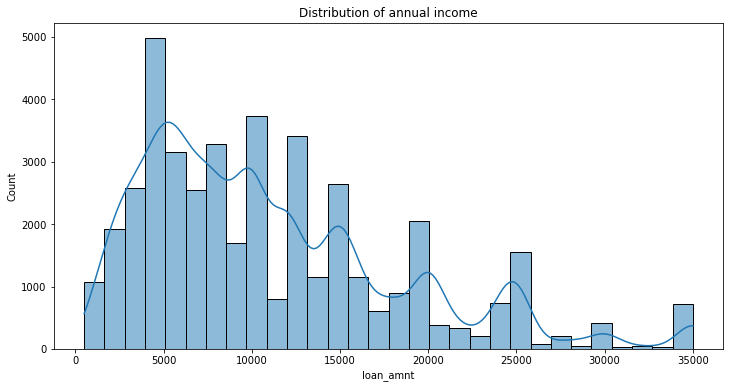

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(raw_data["loan_amnt"], bins=30, kde=True)
plt.title('Distribution of annual income')
plt.show()

b. Ditribution of annual income

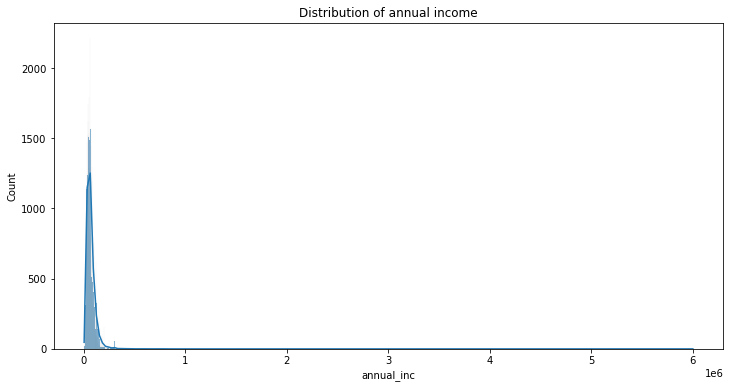

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(raw_data["annual_inc"], kde=True)
plt.title('Distribution of annual income')
plt.show()

b. Ditribution of interest rate

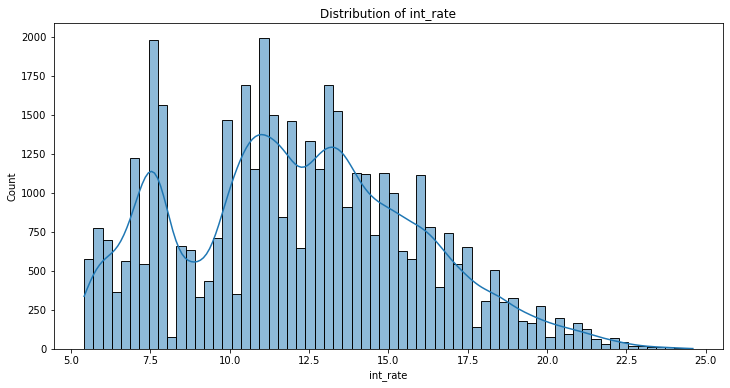

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(raw_data["int_rate"], kde=True)
plt.title('Distribution of int_rate')
plt.show()

c.Distribution of installment

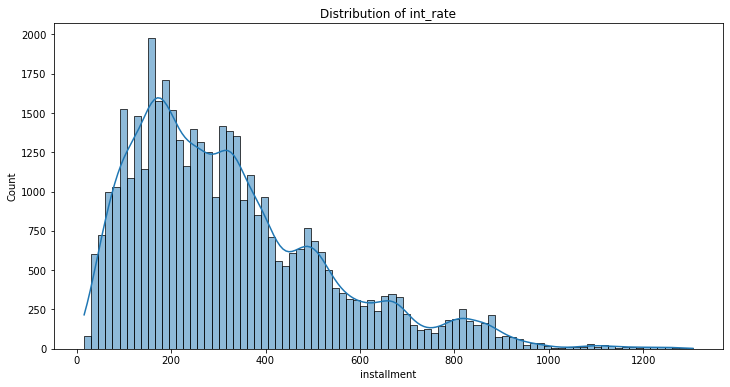

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(raw_data["installment"], kde=True)
plt.title('Distribution of int_rate')
plt.show()

d. b. Ditribution of dti

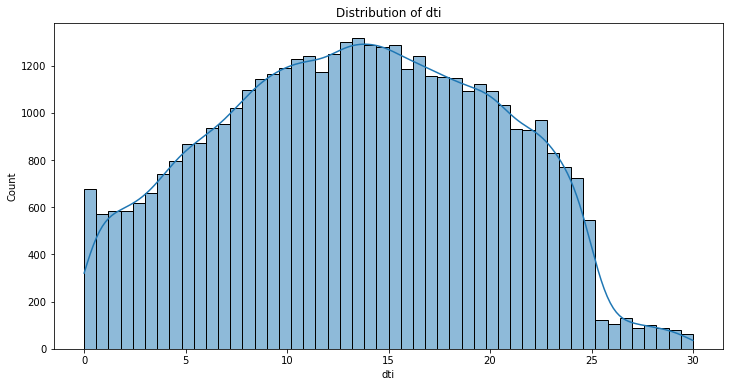

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(raw_data["dti"], kde=True)
plt.title('Distribution of dti')
plt.show()

b. Ditribution of revolving balance

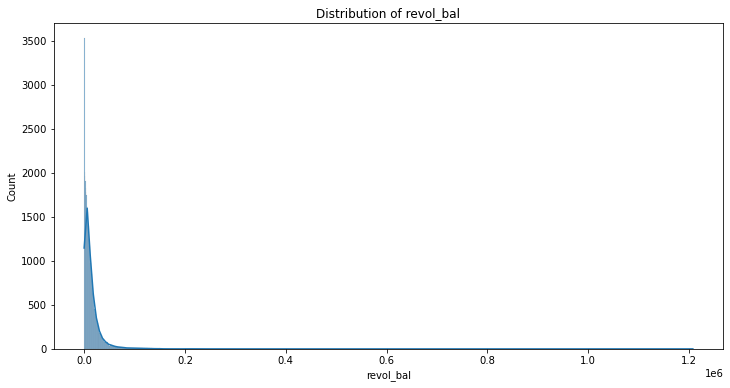

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(raw_data["revol_bal"], kde=True)
plt.title('Distribution of revol_bal')
plt.show()

b. Ditribution of revolving utilization

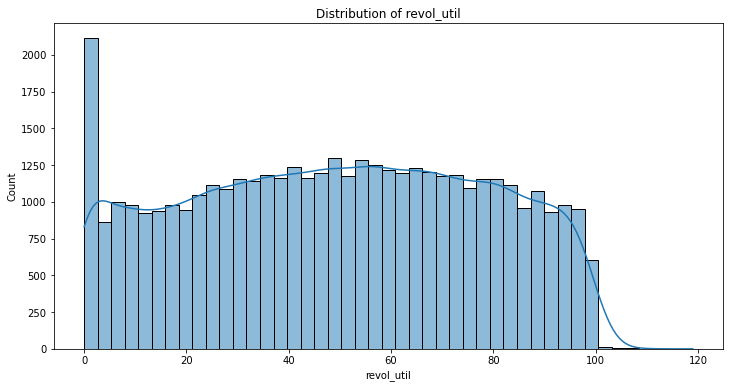

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(raw_data["revol_util"], kde=True)
plt.title('Distribution of revol_util')
plt.show()

Histograms for all variables

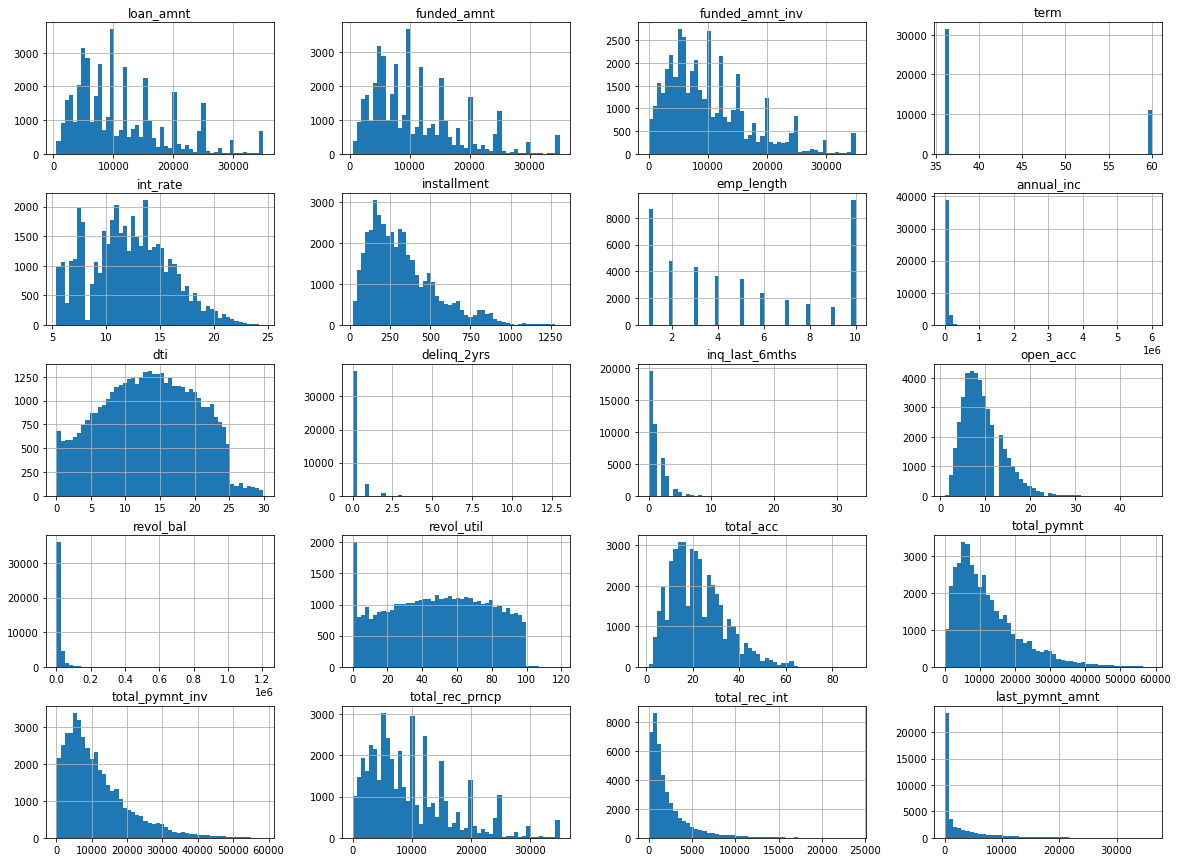

In [72]:
%matplotlib inline 
data = pd.read_csv("D:/assignment_data_science/Bank_loans/raw_loan_default2.csv")
data.hist(bins=50, figsize=(20,15))
plt.show()

Inference:
1.
2.
3.
4.
5.
6.

In [20]:
raw_data['verification_status_code'] = pd.factorize(raw_data.verification_status)[0]

# B.Unique and counts of Categorical attributes ( countplot, pie-chart)


Count of polpulation of Employment length highest to lowest

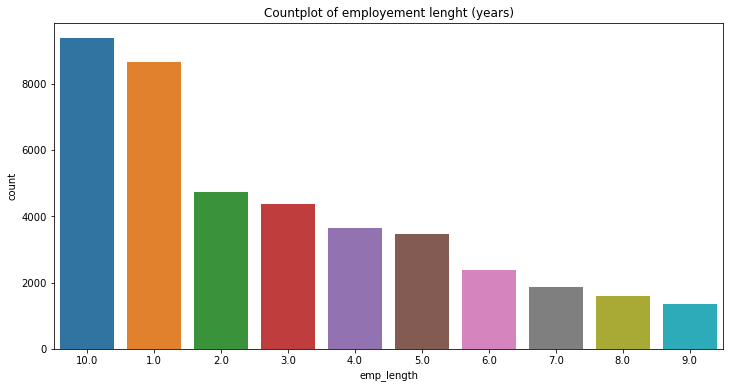

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=raw_data, order= raw_data["emp_length"].value_counts(ascending=False).index)
plt.title("Countplot of employement lenght (years)")
plt.show()

Count of polpulation of home ownership type highest to lowest

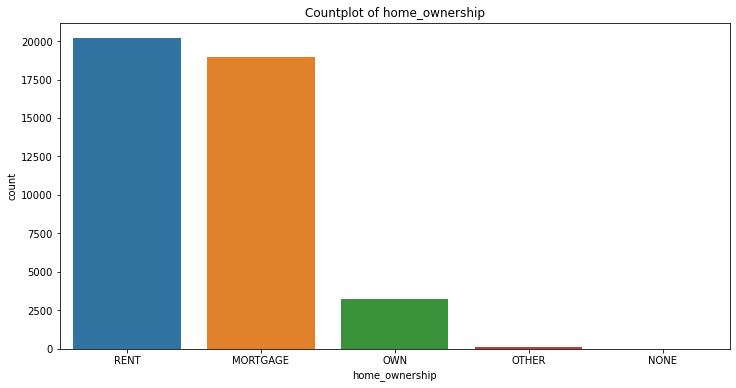

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', data=raw_data, order= raw_data["home_ownership"].value_counts(ascending=False).index)
plt.title("Countplot of home_ownership")
plt.show()

Count of polpulation of Employment length highest to lowest

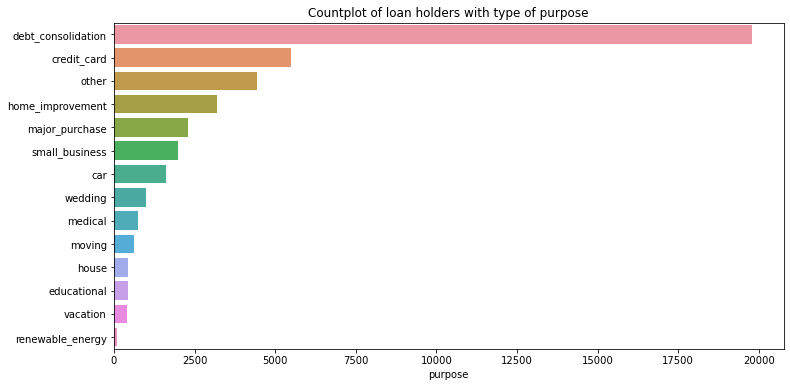

In [65]:
plt.figure(figsize=(12,6))
data = raw_data.purpose.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.title("Countplot of loan holders with type of purpose")
plt.show()

# C. Relationship between loan ammount and other attributes

Scatter plots for relationship between numerical and categorical attributes

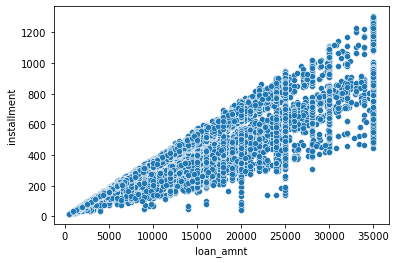

In [24]:
sns.scatterplot(data=raw_data, x="loan_amnt", y="installment")
plt.show()

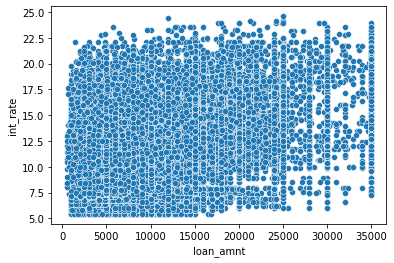

In [25]:
sns.scatterplot(data=raw_data, x="loan_amnt", y="int_rate")
plt.show()

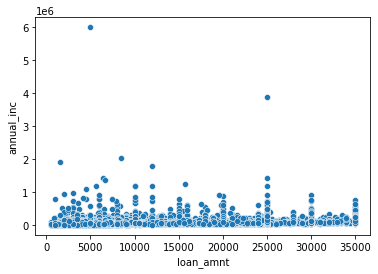

In [26]:
sns.scatterplot(data=raw_data, x="loan_amnt", y="annual_inc")
plt.show()

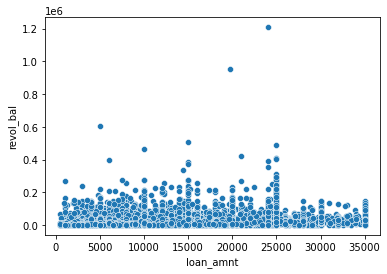

In [27]:
sns.scatterplot(data=raw_data, x="loan_amnt", y="revol_bal")
plt.show()

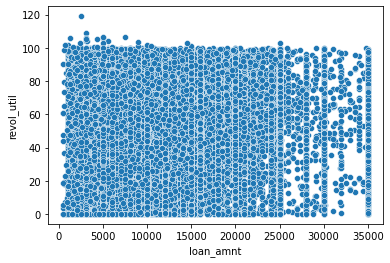

In [28]:
sns.scatterplot(data=raw_data, x="loan_amnt", y="revol_util")
plt.show()

Relationship between int rate and other variables

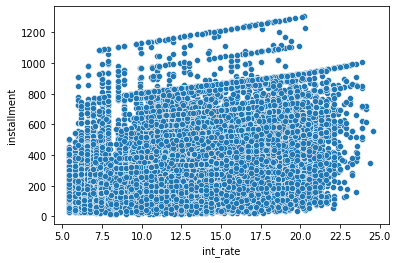

In [30]:
sns.scatterplot(data=raw_data, x= "int_rate", y="installment")
plt.show()

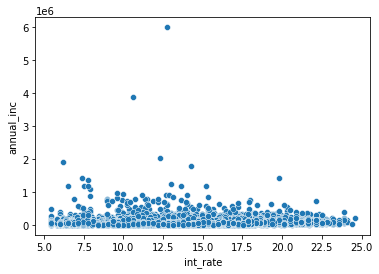

In [31]:
sns.scatterplot(data=raw_data, x= "int_rate", y="annual_inc")
plt.show()

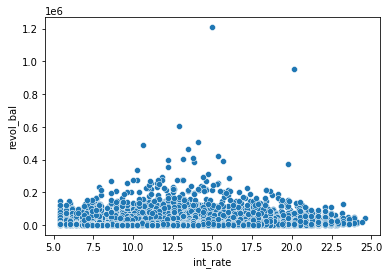

In [32]:
sns.scatterplot(data=raw_data, x= "int_rate", y="revol_bal")
plt.show()

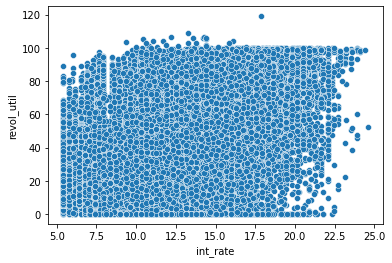

In [33]:
sns.scatterplot(data=raw_data, x= "int_rate", y="revol_util")
plt.show()

Relationship between installment and other variables

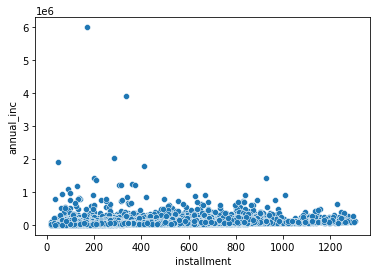

In [35]:
sns.scatterplot(data=raw_data, x="installment", y="annual_inc")
plt.show()

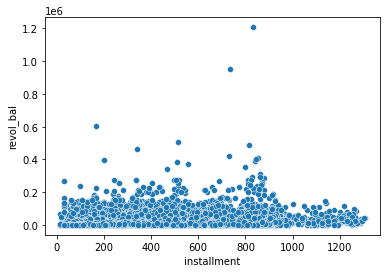

In [36]:
sns.scatterplot(data=raw_data, x="installment", y="revol_bal")
plt.show()

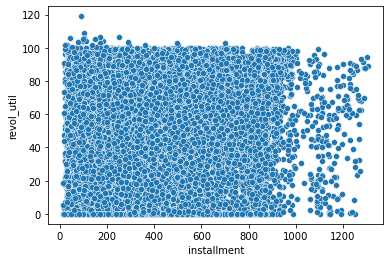

In [37]:
sns.scatterplot(data=raw_data, x="installment", y="revol_util")
plt.show()

Relationship between annual income and others

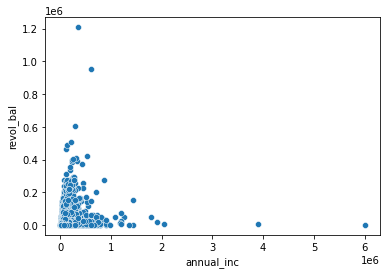

In [38]:
sns.scatterplot(data=raw_data, x="annual_inc", y="revol_bal")
plt.show()

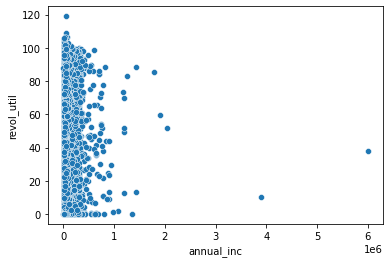

In [39]:
sns.scatterplot(data=raw_data, x="annual_inc", y="revol_util")
plt.show()

Relationship between Revol bal and revol util

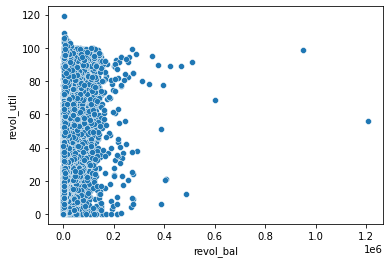

In [40]:
sns.scatterplot(data=raw_data, x="revol_bal", y="revol_util")
plt.show()

# D. Correlation matrix between numerical variables

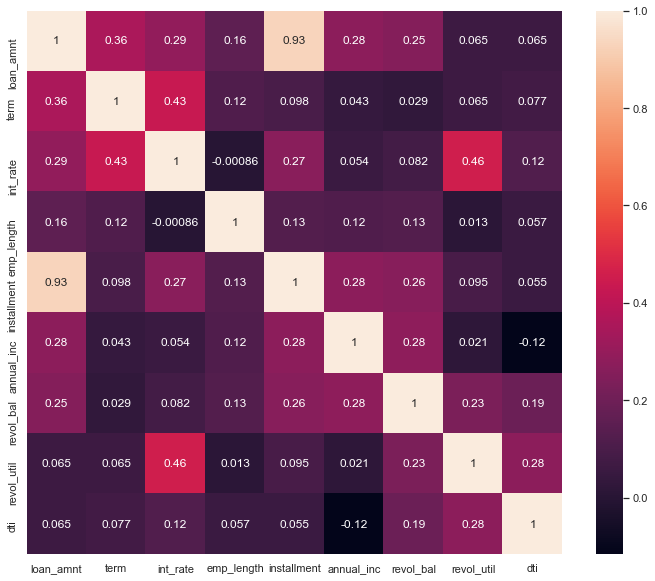

In [149]:
df = pd.DataFrame(raw_data,columns=['loan_amnt','term','int_rate','emp_length','installment','annual_inc','revol_bal', 'revol_util', 'dti'])
import seaborn as sn
plt.figure(figsize=(12,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# E. Relation between Numerical and categorical values.

Bar plots

Are people taking more loans for 36 months or 60 months?

C:\Users\isha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


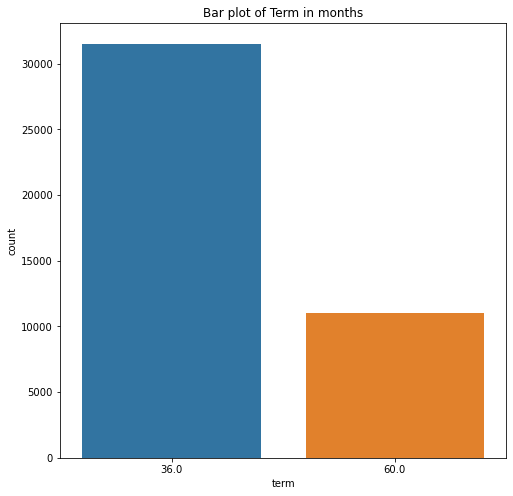

In [78]:
plt.figure(figsize=(8,8))
sns.countplot("term", data=raw_data, order = raw_data['term'].value_counts(ascending=False).index)
plt.title("Bar plot of Term in months")
plt.show()


    The number of loans taken for a period of 36 months is more than loans taken for 60 months.

Which of the two terms amount of lonns is greater?

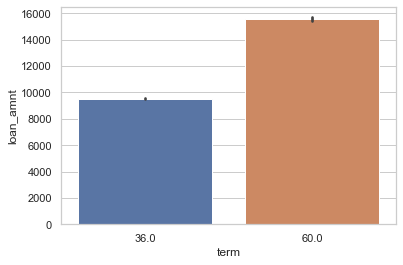

In [126]:
sns.set_theme(style="whitegrid")
sns.barplot(x="term", y="loan_amnt", data=raw_data)
plt.show()


    The amount of loan taken for 60 months is more than for 36 months.

What is the type of home ownership for the maximum amout of loans taken?

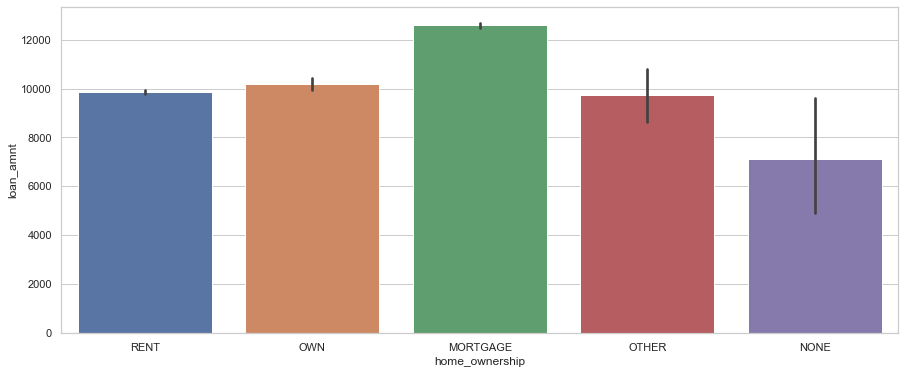

In [94]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="home_ownership", y="loan_amnt", data=raw_data)
plt.show()


     The type of home ownership for maximum loans taken is mortgage.

For what purpose, the amount of loan taken is maximum?

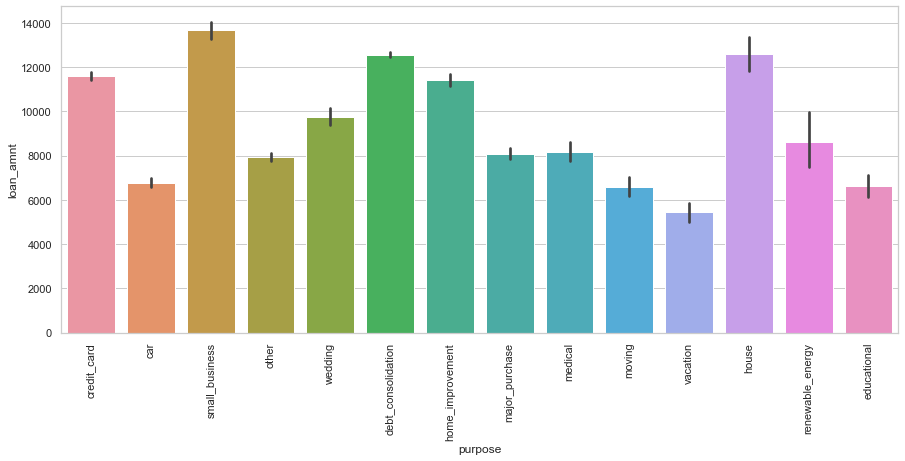

In [124]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="purpose", y="loan_amnt", data=raw_data)
plt.xticks(rotation='vertical')
plt.show()

      Loan amount is maximum for the loans taken for small business

On what type of purpose of loans taken, the interest rate is highest?

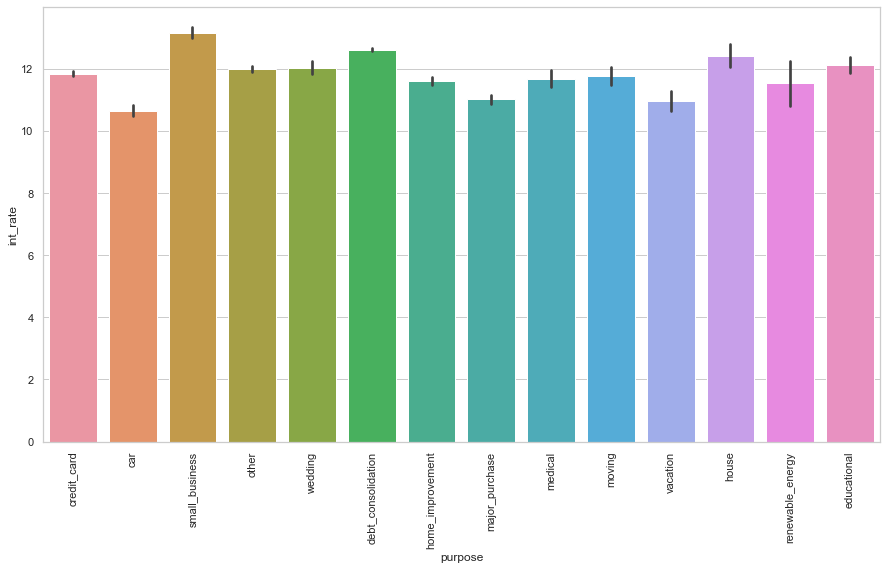

In [81]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="purpose", y="int_rate", data=raw_data)
plt.xticks(rotation='vertical')
plt.show()

     Interest rate is maximum of the loans taken for the purpose of small business.

On what type of purpose of loans taken, the interest rate is highest for 36 months and 60 months?

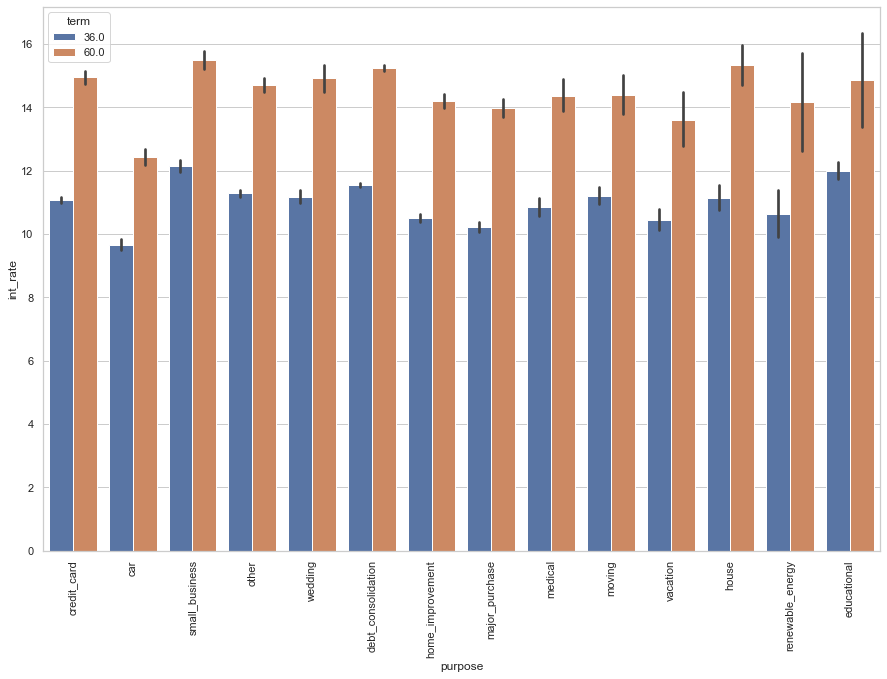

In [119]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="purpose", y="int_rate", hue=a"term", data=raw_data)
plt.xticks(rotation='vertical')
plt.show()

    For both long term and short term, the loans taken for small business has highest interst rates

For what purpuse is the loan amount being taken maximum for highest period

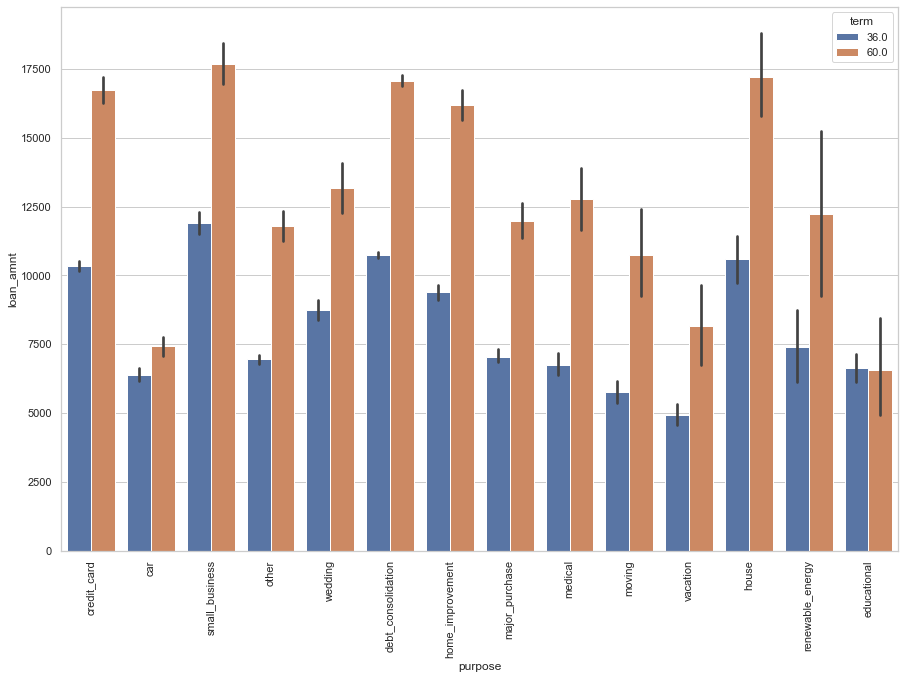

In [141]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="purpose", y="loan_amnt", hue="term", data=raw_data)
plt.xticks(rotation='vertical')
plt.show()

    For the purpose of small business the laon amount being taken is maximum for 60 months

What type of purpose of loans are being taken for 60 months, by people having highest annual income?

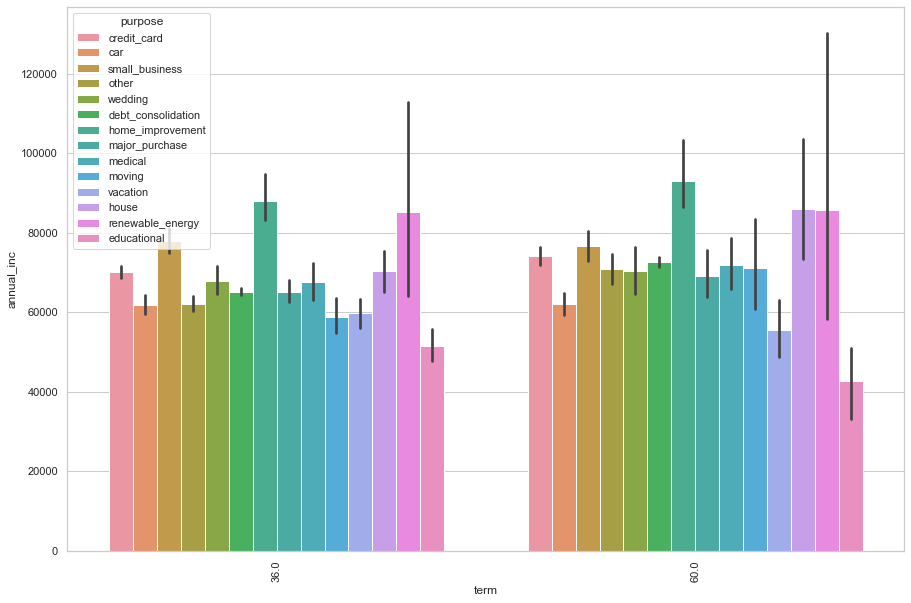

In [114]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="term", y="annual_inc", hue="purpose", data=raw_data)
plt.xticks(rotation='vertical')
plt.show()

    Loans taken for home improvemnet are being taken mostly my high annual income people for 60 months.

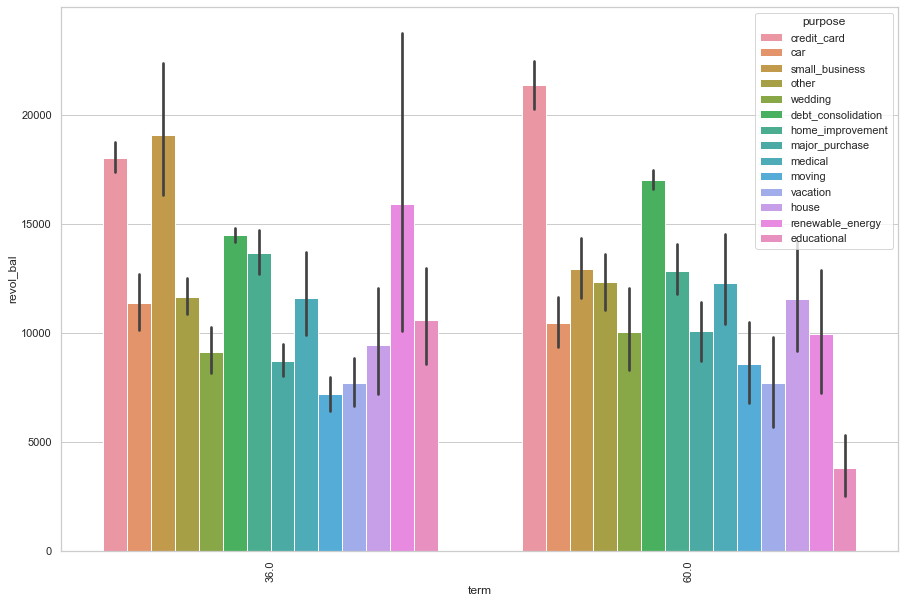

In [113]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="term", y="revol_bal", hue="purpose", data=raw_data)
plt.xticks(rotation='vertical')
plt.show()

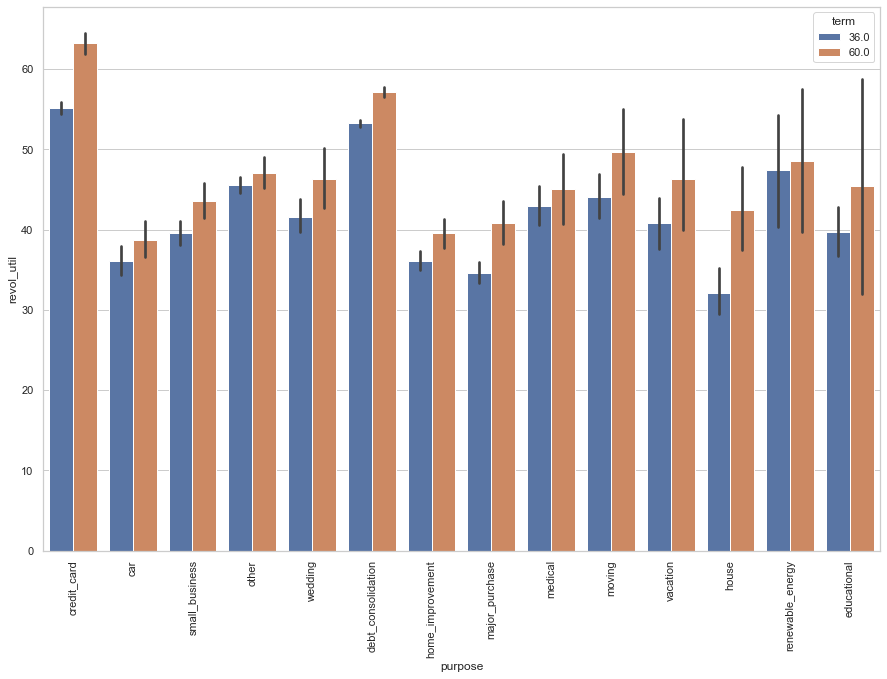

In [122]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="purpose", y="revol_util", hue="term", data=raw_data)
plt.xticks(rotation='vertical')
plt.show()

What type of loans with highest employemnet legth, highest type of home ownership is being charged off?

In [136]:
df = raw_data[raw_data['loan_status'].isin(["Fully Paid","Charged Off"])]
df1 = raw_data[raw_data['loan_status'].isin(["Fully Paid","Charged Off","Current", "Default"])]

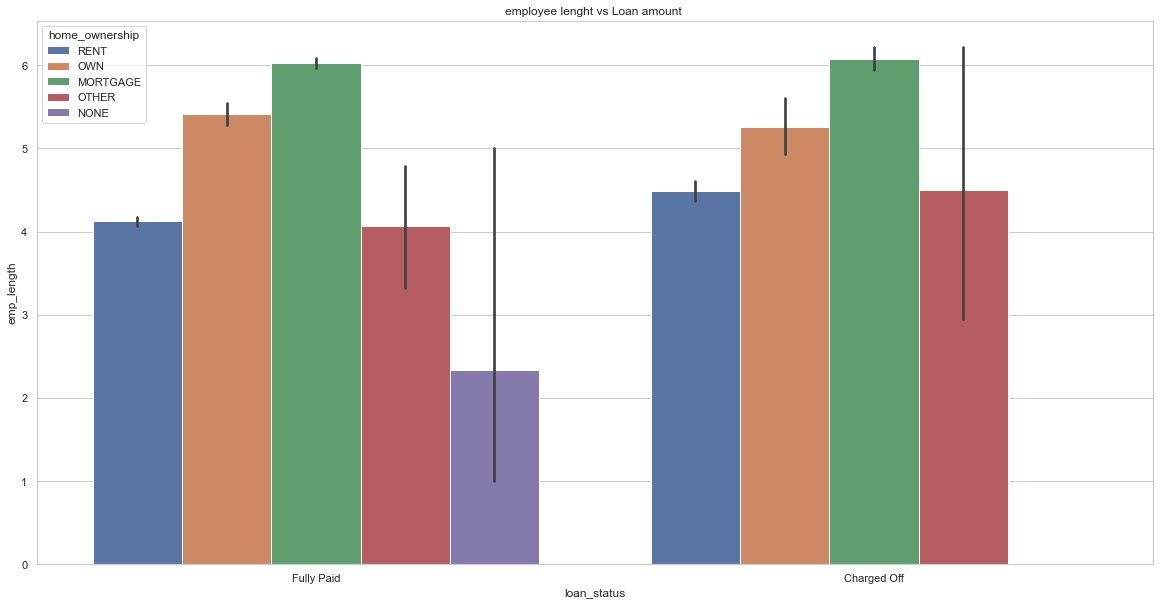

In [137]:
plt.figure(figsize=(20,10))
sns.barplot(x='loan_status', y='emp_length' , data=df , hue="home_ownership")
plt.title('employee lenght vs Loan amount ')
plt.show()

    Number of loans of employees with Employement length of 6 years, type of home ownership as Mortgage being charged off is maximum

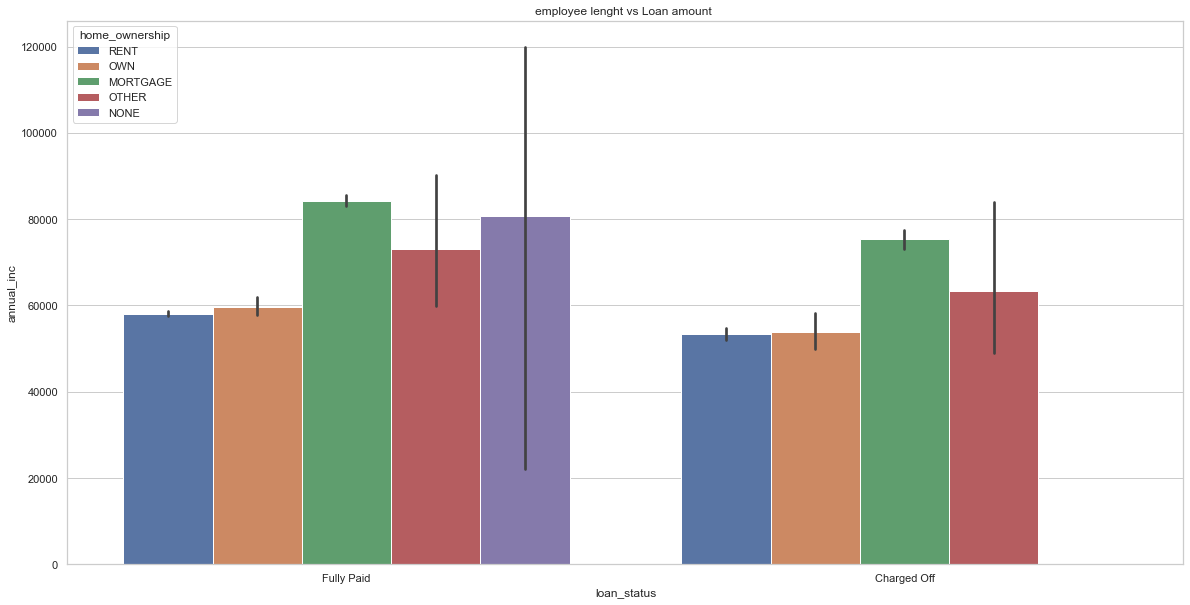

In [138]:
plt.figure(figsize=(20,10))
sns.barplot(x='loan_status', y='annual_inc' , data=df , hue="home_ownership")
plt.title('employee lenght vs Loan amount ')
plt.show()

    Number of loans of employees with annual income nearly 12500$ , with type of home ownership as Mortgage being paid is     
    maximum

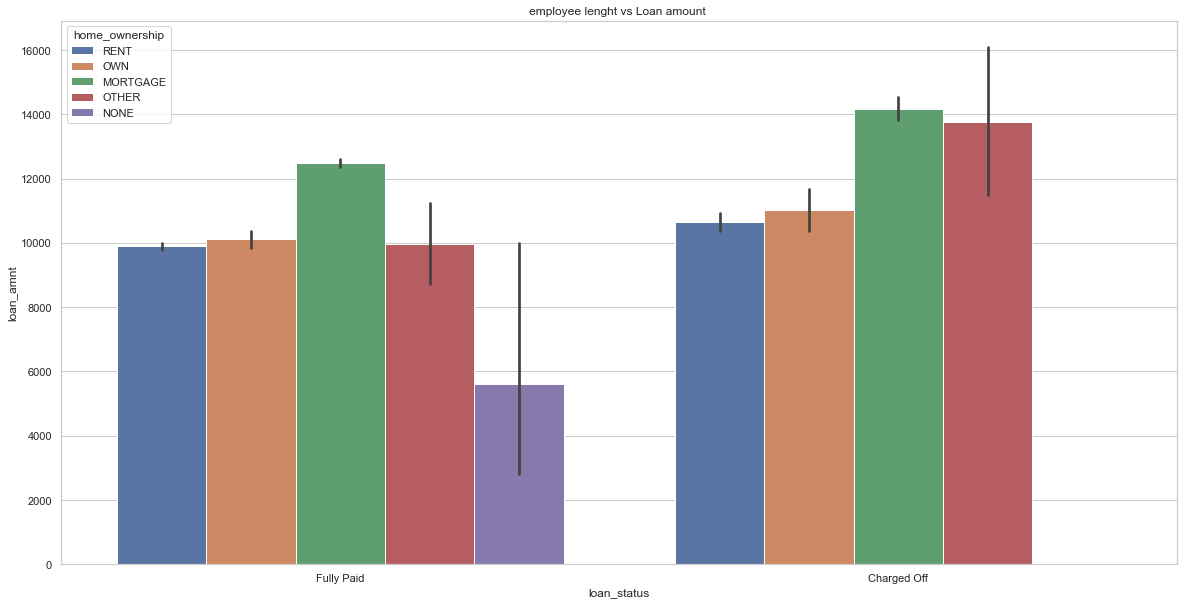

In [108]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='loan_amnt' , data=df , hue="home_ownership")
plt.title('employee lenght vs Loan amount ')
plt.show()

    Number of loans of employees with loan amount nearly 14000$ , with type of home ownership as Mortgage being charged off is maximum

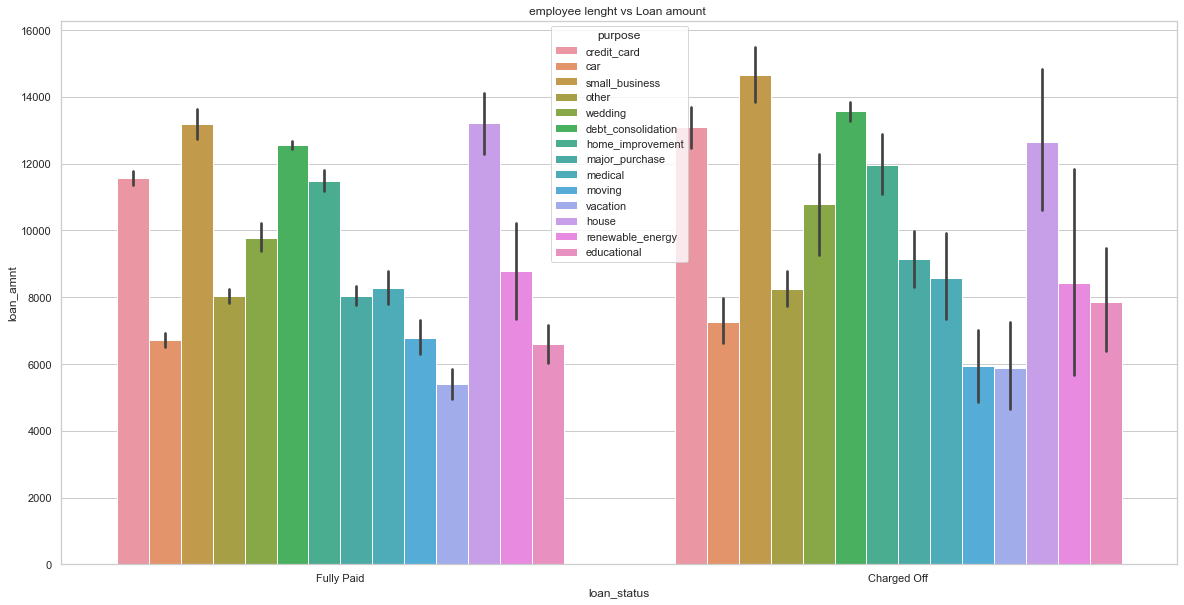

In [109]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='loan_amnt' , data=df , hue="purpose")
plt.title('employee lenght vs Loan amount ')
plt.show()

    Numer of loans taken for small buisness having loan amount nealry 14500 being charged off is maximum and is more than 
    loans being paid

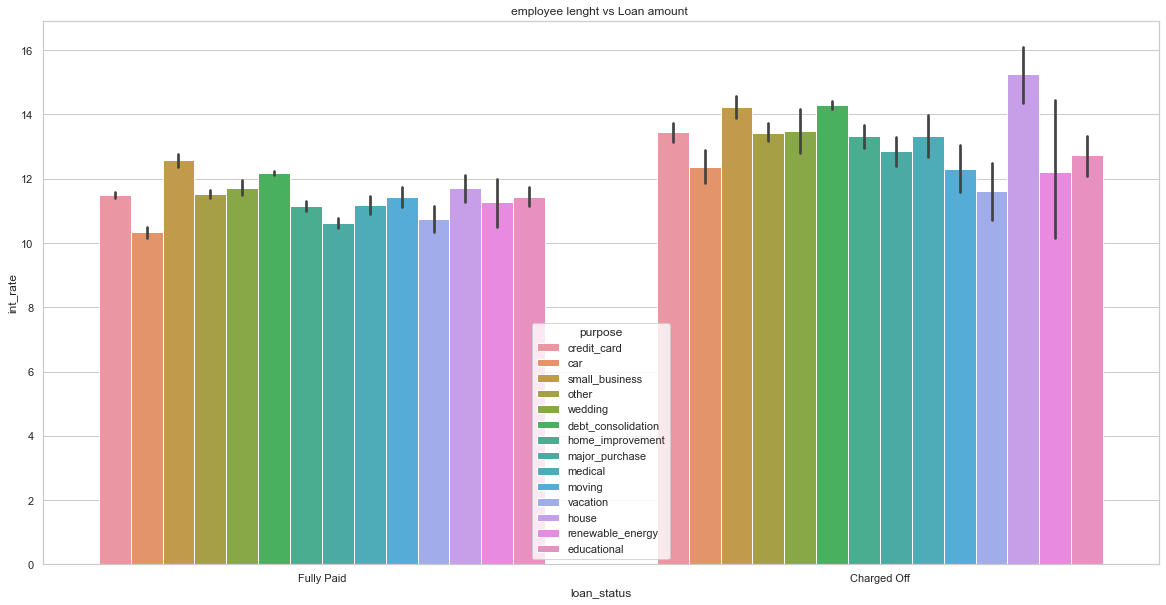

In [112]:
plt.figure(figsize=(20,10))

sns.barplot(x='loan_status', y='int_rate' , data=df , hue="purpose")
plt.title('employee lenght vs Loan amount ')
plt.show()

     Maximum numer of loans being paid are having interest rate nearly 12.5% and being take for small buisness.
     Maximum number of loans being charged off are having interest rate nearly 15% and bing taken for house.
     